***Problem statement ***: Predict sales using the input parameter giving the advertisment in Newspaper , TV  , Radio.

From this we have three input features and output features

First we will perfom simple linear regresion and look the observations



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# import the data
data = pd.read_csv("/content/Advertising.csv")

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.drop(['Unnamed: 0'],axis = 1, inplace = True)# drop the unwantd column

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
import scipy.stats as stats
# test the hypothesis that there is no corelation between tv and sales
corr, pval = stats.pearsonr(data['TV'],data['Sales'])
if pval < 0.05:
  print('reject the null hypothesis:There is a significant correlation between TV and Sales.')
else:
  print('Fail to reject the null hypothesis: There is no significant correlation between TV and Sales.')


reject the null hypothesis:There is a significant correlation between TV and Sales.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# there is no missing value


<Axes: >

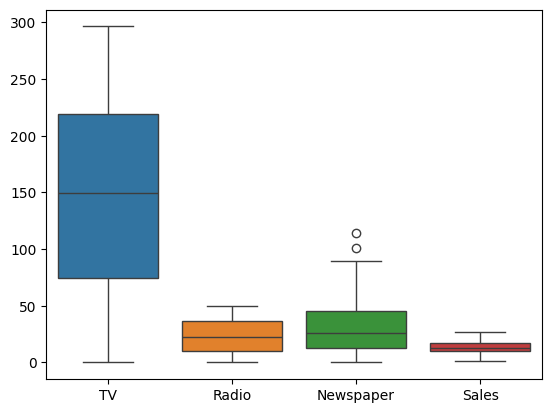

In [10]:
import seaborn as sns
sns.boxplot(data)

In [11]:
!pip install feature-engine -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 7.1 MB/s eta 0:00:00


In [12]:
from feature_engine.outliers import Winsorizer
remove = Winsorizer(capping_method='quantiles',tail ='both',variables=['TV','Radio','Newspaper'])

In [13]:
clenead_data = remove.fit_transform(data)

<Axes: >

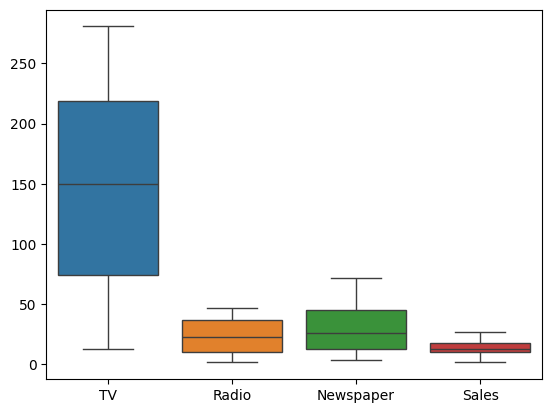

In [14]:
sns.boxplot(clenead_data)

In [15]:
clenead_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,146.929000,23.217250,30.035250,14.022500
std,84.753182,14.621118,20.081675,5.217457
min,13.195000,1.995000,3.600000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,280.735000,46.810000,71.825000,27.000000


 Lets try to understand the relationship between input variable verses the output varaible


<Axes: >

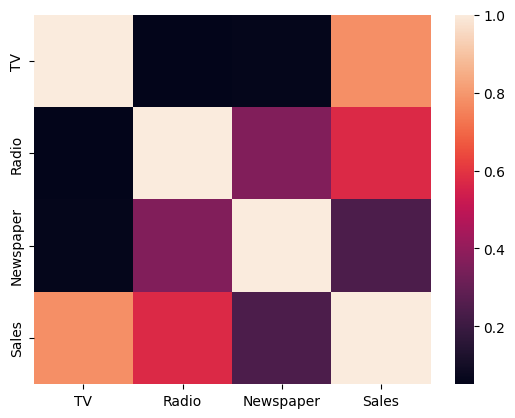

In [16]:
sns.heatmap(clenead_data.corr())

Priliminary assumption that sales will increase if we do more spending on TV Ads


<Axes: xlabel='Newspaper', ylabel='Sales'>

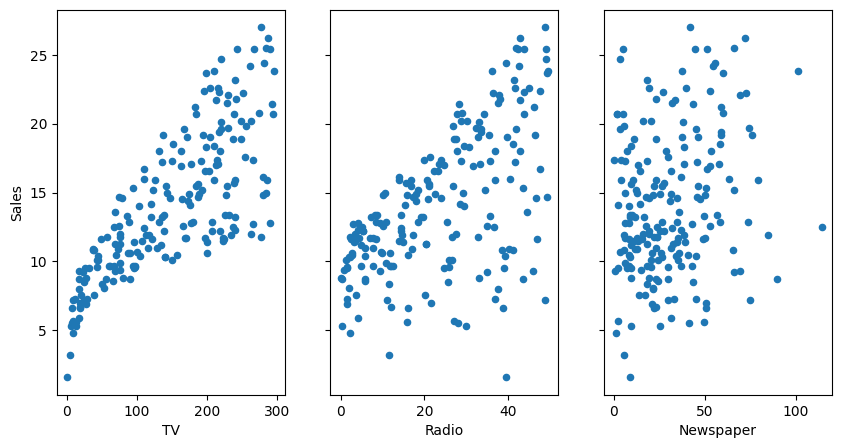

In [19]:
# Try to analyze the data in detail

fig, axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax =axs[0], figsize=(10,5))

data.plot(kind='scatter',x='Radio',y='Sales',ax =axs[1])

data.plot(kind='scatter',x='Newspaper',y='Sales',ax =axs[2])

data visualization : Promotion TV will increase the sale then Radio, there no clear understanding of wheather newspaper will contribute to sales or not

**Simple Linear Regresion:** We will one input varible TV and also estimate sales

Lets create input and output feature

In [20]:
feature_cols = ["TV","Radio","Newspaper"]
x = clenead_data[feature_cols]
y = clenead_data.Sales

In [21]:
from sklearn.linear_model import LinearRegression


In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x,y)

LinearRegression()

In [24]:
lr.coef_


array([0.04631881, 0.19039261, 0.00090596])

In [25]:
lr.intercept_

2.769320231198174

In [39]:
x_new = pd.DataFrame({"TV":[clenead_data.TV.min(),clenead_data.TV.max()],"Radio":[clenead_data.Radio.min(),clenead_data.Radio.max()],"Newspaper":[clenead_data.Newspaper.min(),clenead_data.Newspaper.max()]})

In [40]:
x_new

,TV,Radio,Newspaper
0,13.195,1.995,3.600
1,280.735,46.810,71.825


In [42]:
preds =lr.predict(x_new)

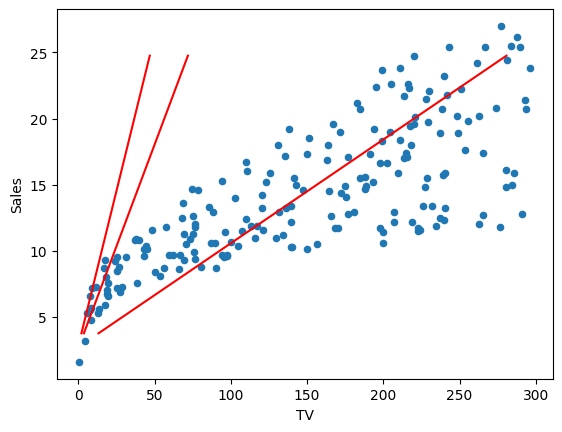

In [43]:
data.plot(kind='scatter',x= "TV",y="Sales")
plt.plot(x_new,preds,c="red")

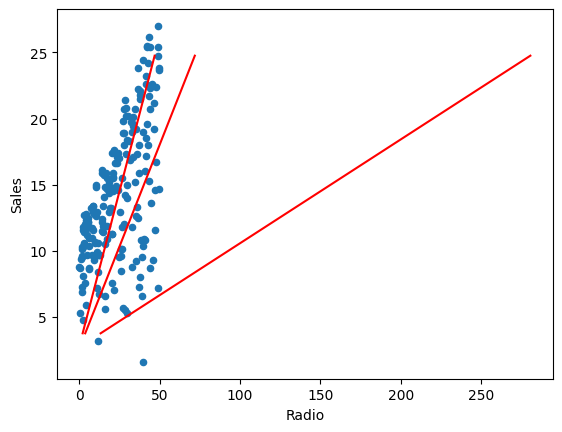

In [45]:
data.plot(kind='scatter',x= "Radio",y="Sales")
plt.plot(x_new,preds,c="red")

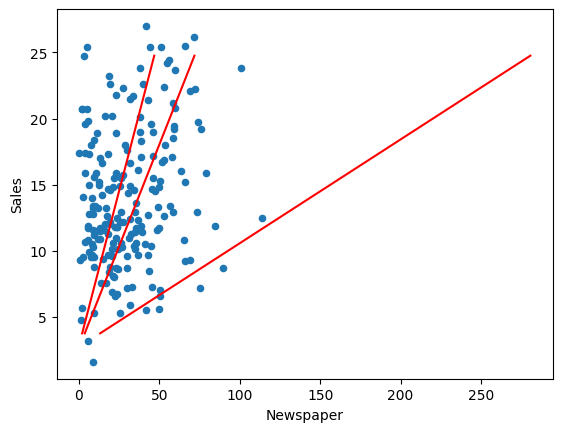

In [46]:
data.plot(kind='scatter',x= "Newspaper",y="Sales")
plt.plot(x_new,preds,c="red")

**conclusion** : There is an conclusion that spending More money on TV advertisement will improve the sale .

**Statistics**:

Ho: We need to support Hypothesis such as sales will increase when you spend money on TV ads

Ha: There is no significance of improvement sales depends on TV ad promotions

Solution: P-values , significance level - 0.05

When P-value of TV is less than 0.05 , we can say Reject the Ha.


In [47]:
clenead_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales ~ TV",data = clenead_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     307.6
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           3.58e-42
Time:                        13:41:45   Log-Likelihood:                -519.94
No. Observations:                 200   AIC:                             1044.
Df Residuals:                     198   BIC:                             1050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9675      0.464     15.013      0.0

In [49]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ Newspaper + TV ', data =clenead_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           3.52e-45
Time:                        13:51:46   Log-Likelihood:                -509.77
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5513      0.539     10.297      0.0

In [50]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ Newspaper + TV + Radio', data =clenead_data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     549.0
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           4.45e-95
Time:                        13:52:01   Log-Likelihood:                -389.59
No. Observations:                 200   AIC:                             787.2
Df Residuals:                     196   BIC:                             800.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7693      0.324      8.554      0.0

**Conclusion** : The sales contribution is soley dependent on TV and Radio , when we taken all three input parameters , when you taken single varibale its saying all are sigficant.

In [51]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.8 MB/s eta 0:00:00


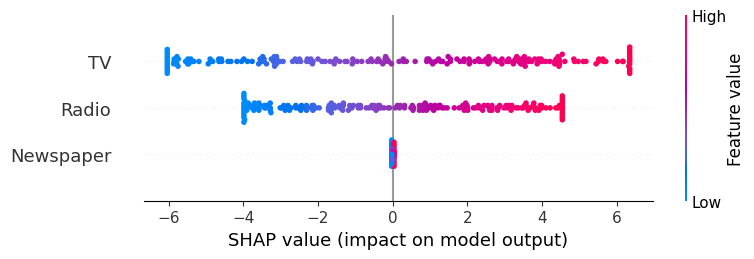

In [54]:
import shap
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y) # Assuming X is your feature matrix and y is your target vector
# create a SHAP explainer object
explainer = shap.Explainer(lr,x)
# calculate SHAP values
shap_values = explainer.shap_values(x)
# visualize SHAP values
shap.summary_plot(shap_values,features=x)

In [57]:
# compute feature importance
feature_importance = np.abs(shap_values).mean(axis=0) # Taking the mean absolute SHAP values for each feature
feature_names = x.columns # assuming x is a pandas DataFrame with column names
# create a dataframe to store feature importance
feature_importance_df = pd.DataFrame(feature_importance,index = feature_names,columns=["SHAP Importance"])
# sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="SHAP Importance", ascending = False)
# print feature importance
print(feature_importance_df)

           SHAP Importance
TV                3.450698
Radio             2.442690
Newspaper         0.015370


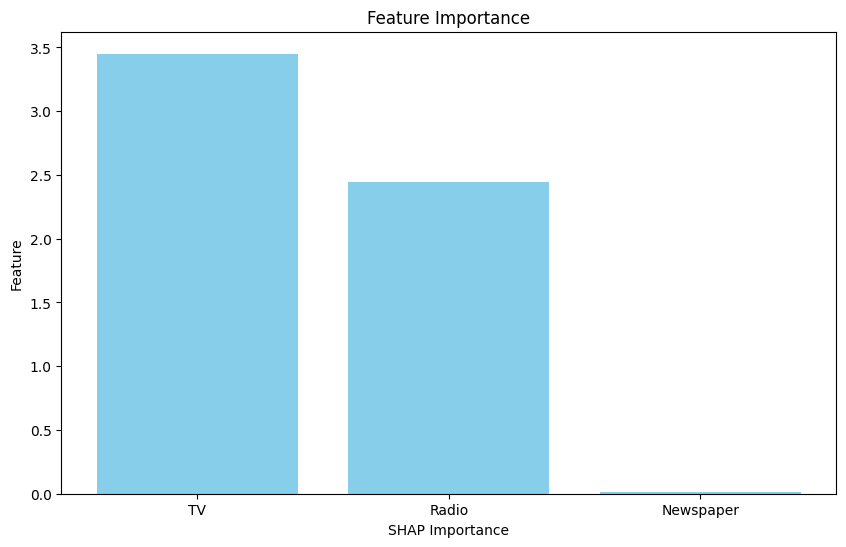

In [58]:
import matplotlib.pyplot as plt
# ploting feature importance
plt.figure (figsize =(10,6))
plt.bar(feature_importance_df.index, feature_importance_df["SHAP Importance"],color = "skyblue")
plt.xlabel("SHAP Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

** conclusion**: from above bar graph i conclude that advertisement in newspaper is more effective to sales more.